![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
df1=pd.read_csv(link,encoding = 'latin1')
df=df1

In [0]:
# Print out First 5 rows from dataframe
# Your code here
df.head(5)
# Invoice: bill



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [0]:
# Print out brief 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [0]:
# Your code here
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [0]:
# List all NaN values

# list in dataframe
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


**Exclude negative Quatity entries**

In [0]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill
504697,C578991,85204,HANGING WOOD AND FELT FLOWER,-1,11/27/11 15:31,0.12,15555.0,United Kingdom,-0.12
329372,C565843,85194S,HANGING SPRING FLOWER EGG SMALL,-1,9/7/11 12:15,0.19,14606.0,United Kingdom,-0.19
440246,C574524,84929,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,-1,11/4/11 13:53,0.19,17841.0,United Kingdom,-0.19
72727,C542256,21883,STARS GIFT TAPE,-1,1/26/11 17:04,0.19,17722.0,United Kingdom,-0.19
199723,C554100,16235,RECYCLED PENCIL WITH RABBIT ERASER,-1,5/22/11 13:27,0.21,15555.0,United Kingdom,-0.21
140693,C548454,M,Manual,-1,3/31/11 11:42,0.22,16422.0,United Kingdom,-0.22
159705,C550353,51020B,STRIPY DESIGN SHOWER CAP,-1,4/18/11 10:29,0.29,17841.0,United Kingdom,-0.29
311404,C564281,23185,FRENCH STYLE STORAGE JAR JAM,-1,8/24/11 10:54,0.29,14796.0,United Kingdom,-0.29
516370,C579886,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-1,11/30/11 17:39,0.29,15676.0,United Kingdom,-0.29
531362,C580919,21642,ASSORTED TUTTI FRUTTI PEN,-1,12/6/11 14:07,0.29,16571.0,United Kingdom,-0.29


**Exclude negative Price entries**

In [0]:
df[df['UnitPrice']<0]
# df.info()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill


In [0]:
# clean data
# drop customer withdown id
df.dropna(subset=['CustomerID'], inplace=True)
df.isnull().sum()
#bo di gia tri am
df=df[(~df['Quantity']<0)| (df['UnitPrice']<0)]

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [80]:
# Your code here
# so luong order la so luong bill nhieu
# highest=df['UnitPrice'].max()
# highest
# df[df['UnitPrice']==highest]
# # df[df['UnitPrice']==highest]['CustomerID']
# df1=df.groupby('CustomerID').sum()
# vì Quantity âm nên phải clean nó
# df=df[df['Quantity']>0]
# df['UnitPrice'].unique()
df['Total Bill']=df['Quantity']*df['UnitPrice']
df[df['Total Bill']<0]
df=df.sort_values(by=['Total Bill'],ascending=False)
# select=(df['Total Bill'].max()) & (df['Country'] =='United Kingdom')
df[df['Country']=='United Kingdom'][:1]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom,168469.6


In [0]:
customer_country=df[['Country','CustomerID']].drop_duplicates()
customer_country
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)
df.loc[df1['Country'] == 'United Kingdom'][:1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446.0,United Kingdom,168469.6


**The customer with the highest money spent on purchases comes from Netherlands**

In [0]:
# Your code here
# df['Country'].nunique()
# df['Country'].str.lower().nunique()
df[df['Country']=='Netherlands'][:1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill
421601,573003,23084,RABBIT NIGHT LIGHT,2400,10/27/11 12:11,2.08,14646.0,Netherlands,4992.0


![alt text](https://)**On which year had the highest sales?**

In [0]:
# Your code here
# format lai m/d/y/time
# tach nam ra 1 cot
# group nam
# df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')
from datetime import datetime, time as dt
from pandas._libs.tslibs import Timestamp, conversion, parsing

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Year']=df['InvoiceDate'].dt.year

In [94]:

df3=df.groupby('Year').sum()

df3
# df3[df3['Total Bill'].max()]


,Quantity,UnitPrice,CustomerID,Total Bill
Year,,,,
2010,312280,8.193561e+04,4.062410e+08,5.727139e+05
2011,4869416,1.158065e+06,5.679734e+09,8.338694e+06




```
# This is formatted as code
```

**How many orders (per hour)?**

In [96]:
df['hour']= df['InvoiceDate'].dt.hour
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill,Year,hour
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,2011,9
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,2011,10
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,2011,15
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75,2011,13
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72,2011,11
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40,2011,13
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40,2011,12
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646.0,Netherlands,4992.00,2011,12
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom,4921.50,2011,12
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-04-18 13:20:00,2.40,15749.0,United Kingdom,4632.00,2011,13


In [97]:
# How many orders (per hour)?
df['hour'].value_counts()

12    72069
13    64031
14    54127
11    49092
15    45372
10    37999
16    24093
9     21945
17    13072
8      8691
19     3322
18     2929
20      802
7       379
6         1
Name: hour, dtype: int64

**Make a plot about number of orders per hour**

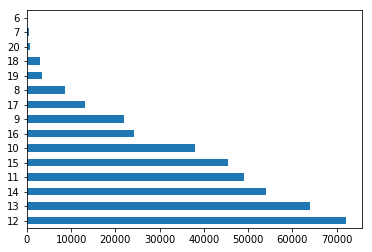

In [99]:
df['hour'].value_counts().plot(kind='barh');

**How many orders (per month)?**

In [102]:
df['month']=df['InvoiceDate'].dt.month
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill,Year,hour,month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,2011,9,12
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,2011,10,1
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,2011,15,6
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75,2011,13,5
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72,2011,11,9


In [115]:
# df.head(5)
df=df.drop('year_month',axis=1)
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Bill,Year,hour,month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,2011,9,12
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,2011,10,1
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,2011,15,6
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75,2011,13,5
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72,2011,11,9


In [0]:
# thang cua nam 
df.insert(loc=5, column='year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))


In [118]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,year_month,UnitPrice,CustomerID,Country,Total Bill,Year,hour,month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,201112,2.08,16446.0,United Kingdom,168469.60,2011,9,12
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,201101,1.04,12346.0,United Kingdom,77183.60,2011,10,1
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,201106,649.50,15098.0,United Kingdom,38970.00,2011,15,6
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,201105,8142.75,16029.0,United Kingdom,8142.75,2011,13,5
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,201109,5.06,17450.0,United Kingdom,7144.72,2011,11,9


In [144]:
# How many orders (per month)?
df4=df.groupby('year_month').sum()


,Quantity,UnitPrice,CustomerID,Total Bill,Year,hour,month
year_month,,,,,,,
201012,312280,81935.610,406240953.0,572713.890,52581600,337402,313920
201101,349147,66964.990,321904509.0,569445.040,42697552,269638,21232
201102,265638,63185.760,305225091.0,447137.350,40075208,248532,39856
201103,348544,88563.100,412680258.0,595500.760,54652947,339638,81531
201104,292225,79005.481,345952584.0,469200.361,45537084,284246,90576
201105,373685,102128.280,431158808.0,678594.560,56955542,354898,141610
201106,363699,85274.730,416663110.0,661213.690,54669035,345095,163110
201107,369432,75919.901,410703863.0,600091.011,53949097,339948,187789
201108,398938,79423.830,412144474.0,645343.900,54323143,344380,216104


**Make a plot about number of orders per month**

In [0]:
import turtle

In [149]:
# ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
# ax.set_xlabel('Month',fontsize=15)
# ax.set_ylabel('Number of Orders',fontsize=15)
# ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
# ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
# plt.show()

df4=df.groupby('InvoiceDate')['year_month'].unique().value_counts().sort_index().plot('bar',figsize=(12,6))
# df4=df.groupby('InvoiceDate')['year_month'].unique().value_counts().sort_index()
# df4
df4.set_xlabel('Month',fontsize=15)
df4.set_ylabel('Number of Orders', fontsize=17)
df4.set_title('Number of orders for different Months (1st Dec 2010-9th Dec 2011)',fontsize=16)
df4.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal' , fontsize=12)
plt.show()


[201012]    1293
[201101]     942
[201102]     967
[201103]    1269
[201104]    1080
[201105]    1436
[201106]    1315
[201107]    1254
[201108]    1211
[201109]    1613
[201110]    1792
[201111]    2409
[201112]     705
Name: year_month, dtype: int64

**Top 10 items most sales**

In [157]:
df.head(5)
df5=df.groupby('StockCode').sum().sort_values(by=['Total Bill'], ascending=False)[:10]
df5


,Quantity,year_month,UnitPrice,CustomerID,Total Bill,Year,hour,month
StockCode,,,,,,,,
23843,80995,201112,2.08,16446.0,168469.60,2011,9,12
22423,12412,346694041,21508.90,25806890.0,142592.95,3466823,21613,11741
85123A,36782,409231947,5887.47,31667793.0,100603.50,4092178,25700,14147
85099B,46181,325383181,3261.69,24748363.0,85220.78,3253714,20026,11781
23166,77916,39819403,241.62,3047321.0,81416.73,398178,2542,1603
POST,3120,221010597,34695.96,14015033.0,77803.96,2210025,13308,8097
47566,15295,280943138,6807.42,21480905.0,68844.33,2809344,17425,8738
84879,35362,283149675,2366.56,21450268.0,56580.34,2831394,17754,10275
M,7179,58318512,49782.81,4457819.0,53779.93,583163,3833,2212


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [171]:
 df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,year_month,UnitPrice,CustomerID,Country,Total Bill,Year,hour,month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,201112,2.08,16446.0,United Kingdom,168469.60,2011,9,12
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,201101,1.04,12346.0,United Kingdom,77183.60,2011,10,1
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,201106,649.50,15098.0,United Kingdom,38970.00,2011,15,6
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,201105,8142.75,16029.0,United Kingdom,8142.75,2011,13,5
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,201109,5.06,17450.0,United Kingdom,7144.72,2011,11,9


In [180]:
group_country=df.groupby('Country').sum()['Quantity'][:10]
group_country

Country
Australia          84209
Austria             4881
Bahrain              260
Belgium            23237
Brazil               356
Canada              2763
Channel Islands     9491
Cyprus              6361
Czech Republic       671
Denmark             8235
Name: Quantity, dtype: int64

In [0]:
# Your code here
del group_country['United Kingdom']

# df.head(5)
# What can you tell about this?

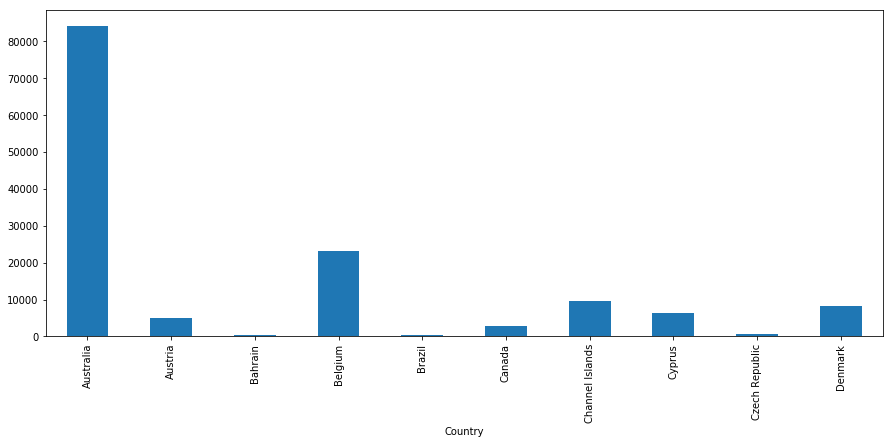

In [182]:
group_country.plot('bar',figsize=(15,6));

### You are awesome!!